# FORECASTING PROJECT - KAGLE TASK

In [1]:
import pandas as pd

aqua_data = pd.read_csv ("/workspaces/Time_Series_2_LeryBenavides/data/raw/Aquifer_Petrignano.csv")
aqua_data

,Date,Rainfall_Bastia_Umbra,Depth_to_Groundwater_P24,Depth_to_Groundwater_P25,Temperature_Bastia_Umbra,Temperature_Petrignano,Volume_C10_Petrignano,Hydrometry_Fiume_Chiascio_Petrignano
0,14/03/2006,NaN,-22.48,-22.18,NaN,NaN,NaN,NaN
1,15/03/2006,NaN,-22.38,-22.14,NaN,NaN,NaN,NaN
2,16/03/2006,NaN,-22.25,-22.04,NaN,NaN,NaN,NaN
3,17/03/2006,NaN,-22.38,-22.04,NaN,NaN,NaN,NaN
4,18/03/2006,NaN,-22.60,-22.04,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
5218,26/06/2020,0.0,-25.68,-25.07,25.7,24.5,-29930.688,2.5
5219,27/06/2020,0.0,-25.80,-25.11,26.2,25.0,-31332.960,2.4
5220,28/06/2020,0.0,-25.80,-25.19,26.9,25.7,-32120.928,2.4
5221,29/06/2020,0.0,-25.78,-25.18,26.9,26.0,-30602.880,2.4


In [2]:
aqua_data = aqua_data[aqua_data.Rainfall_Bastia_Umbra.notna()].reset_index(drop = True)

aqua_data = aqua_data.drop (['Depth_to_Groundwater_P24', 'Temperature_Petrignano', 'Rainfall_Bastia_Umbra', 'Temperature_Bastia_Umbra', 'Volume_C10_Petrignano', 'Hydrometry_Fiume_Chiascio_Petrignano'], axis=1)

aqua_data

,Date,Depth_to_Groundwater_P25
0,01/01/2009,-31.14
1,02/01/2009,-31.11
2,03/01/2009,-31.07
3,04/01/2009,-31.05
4,05/01/2009,-31.01
...,...,...
4194,26/06/2020,-25.07
4195,27/06/2020,-25.11
4196,28/06/2020,-25.19
4197,29/06/2020,-25.18


In [3]:
aqua_data.Date

0       01/01/2009
1       02/01/2009
2       03/01/2009
3       04/01/2009
4       05/01/2009
           ...    
4194    26/06/2020
4195    27/06/2020
4196    28/06/2020
4197    29/06/2020
4198    30/06/2020
Name: Date, Length: 4199, dtype: object

## Transform string to datatime

In [4]:
aqua_data["Date"] = pd.to_datetime(aqua_data["Date"], format = '%d/%m/%Y')
aqua_data = aqua_data.set_index("Date")

ts_aqua = aqua_data["Depth_to_Groundwater_P25"]
ts_aqua.head()


Date
2009-01-01   -31.14
2009-01-02   -31.11
2009-01-03   -31.07
2009-01-04   -31.05
2009-01-05   -31.01
Name: Depth_to_Groundwater_P25, dtype: float64

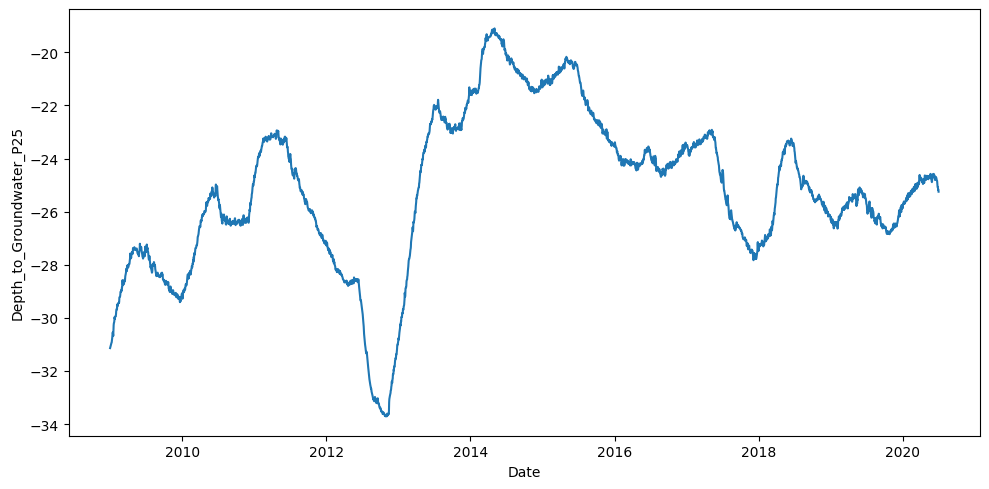

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = ts_aqua)

plt.tight_layout()

plt.show()

## Descomposition

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_aqua.dropna (inplace = True)
descomposition = seasonal_decompose (ts_aqua, period = 7)
descomposition

## Trend Analysis

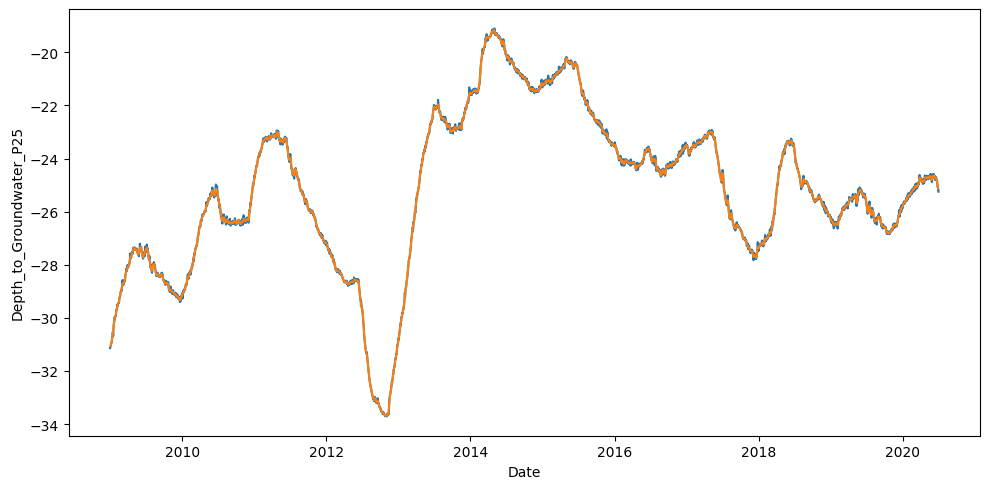

In [7]:
trend = descomposition.trend
fig, axis = plt.subplots (figsize = (10,5))

sns.lineplot (data = ts_aqua)
sns.lineplot (data = trend)

plt.tight_layout()
plt.show()

## Seasonality analysis

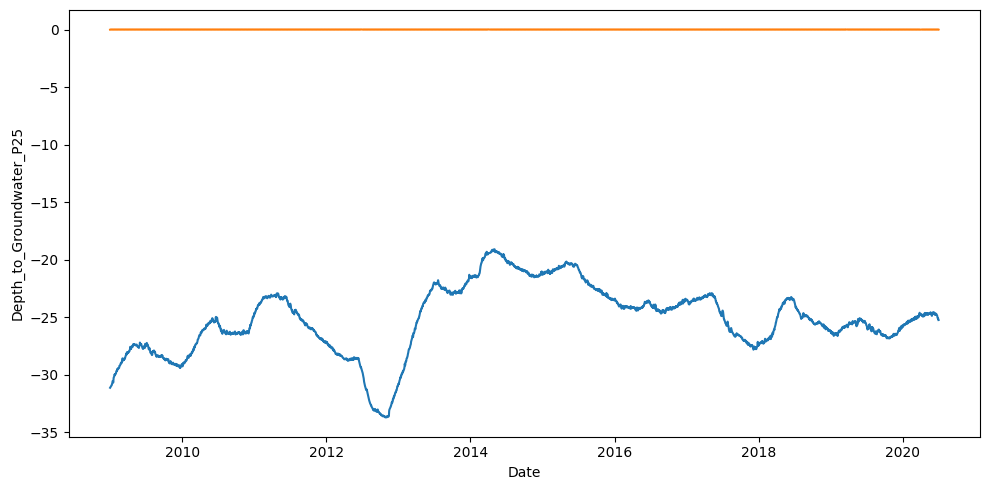

In [8]:
seasonal = descomposition.seasonal
fig, axis = plt.subplots (figsize = (10,5))

sns.lineplot (data = ts_aqua)
sns.lineplot (data = seasonal)

plt.tight_layout()
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Dickey-Fuller test results:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(ts_aqua)

Dickey-Fuller test results:


Test Statistic                   -2.871210
p-value                           0.048800
#Lags Used                       28.000000
Number of Observations Used    4143.000000
Critical Value (1%)              -3.431929
Critical Value (5%)              -2.862238
Critical Value (10%)             -2.567141
dtype: float64

##### p-value es menor a 0.05 por lo que la serie es estacionaria

## Analysis of variability

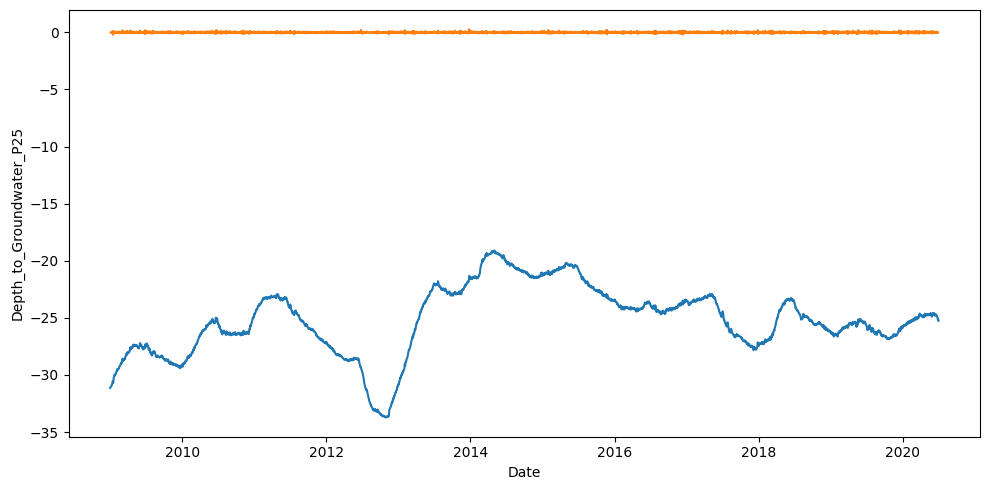

In [9]:
residual = descomposition.resid
fig, axis = plt.subplots (figsize = (10,5))

sns.lineplot (data = ts_aqua)
sns.lineplot (data = residual)

plt.tight_layout()
plt.show()

## Autocorrelation analysis

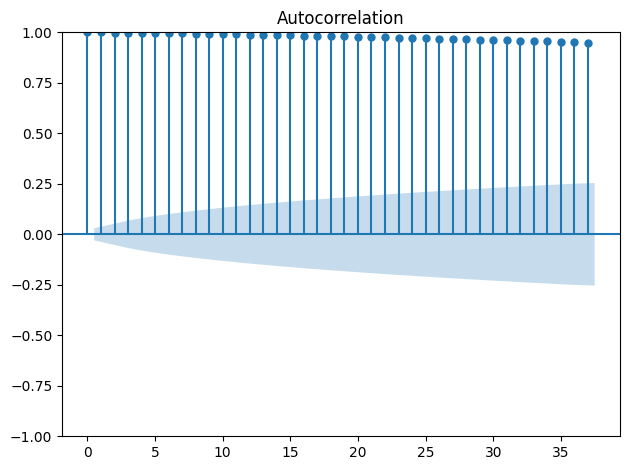

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf (ts_aqua)

plt.tight_layout()
plt.show()

## Model training

In [11]:
ts_stationary = ts_aqua.diff().dropna()
test_stationarity(ts_stationary)

Dickey-Fuller test results:


Test Statistic                   -5.572490
p-value                           0.000001
#Lags Used                       27.000000
Number of Observations Used    4143.000000
Critical Value (1%)              -3.431929
Critical Value (5%)              -2.862238
Critical Value (10%)             -2.567141
dtype: float64

In [15]:
from pmdarima import auto_arima

model = auto_arima (ts_stationary, seasonal = True, trace = True, m = 7)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=-11321.494, Time=8.80 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-8943.699, Time=0.26 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=-9607.838, Time=2.25 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-11301.527, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=-8945.699, Time=0.12 sec
 ARIMA(2,1,2)(0,0,1)[7] intercept   : AIC=-11255.581, Time=3.78 sec
 ARIMA(2,1,2)(1,0,0)[7] intercept   : AIC=-11262.616, Time=3.79 sec
 ARIMA(2,1,2)(2,0,1)[7] intercept   : AIC=-11284.288, Time=13.01 sec
 ARIMA(2,1,2)(1,0,2)[7] intercept   : AIC=-11281.250, Time=6.55 sec
 ARIMA(2,1,2)(0,0,0)[7] intercept   : AIC=-11258.682, Time=1.64 sec
 ARIMA(2,1,2)(0,0,2)[7] intercept   : AIC=-11349.448, Time=14.16 sec
 ARIMA(1,1,2)(0,0,2)[7] intercept   : AIC=-11368.501, Time=13.01 sec
 ARIMA(1,1,2)(0,0,1)[7] intercept   : AIC=-11349.829, Time=6.67 sec


: 

In [14]:
model.summary()

NameError: name 'model' is not defined